IMPORTING LIBRARIES
Seaborn is a Python data visualization library built on top of Matplotlib. 
It provides a high-level interface for creating attractive and informative statistical graphics

Pandas is a powerful and versatile Python library used for data manipulation and analysis. 
It simplifies tasks related to working with structured data, such as cleaning, 
handling missing values, and performing group operations

Matplotlib is an open-source drawing library in Python that supports various types of visualizations, 
including plots, histograms, and bar charts. With just a few lines of code, you can create compelling charts for data analysis, web applications, and Python script.

NumPy is a Python library used for working with arrays. 
It also provides functions for linear algebra, Fourier transforms, and matrix operations

 Scikit-learn is a free and open-source machine learning library for Python.
 It provides a wide range of supervised and unsupervised learning algorithms, 
 making it a powerful tool for data scientists and researchers

In [1]:
!pip install joblib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

IMPORTING & LOADING THE DATASET

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DATASET INFO:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


DATASET SHAPE

In [5]:
df.shape

(614, 13)

DATA CLEANING 

CHECKING THE MISSING VALUES

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First we will fill the Missing Values 
in "LoanAmount" & "Credit_History" by the 
'Mean' & 'Median' of the respective variables.

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

Let's confirm if there are any missing values
in 'LoanAmount' & 'Credit_History'

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now, Let's drop all the missing values remaining.

In [10]:
df.dropna(inplace=True)

Let's check the Missing values for the final time!

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing 
values to avoid disturbances in the model.
THe Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

 Now, Let's check the final Dataset Shape

In [12]:
df.shape

(542, 13)

Exploratory Data Analyis

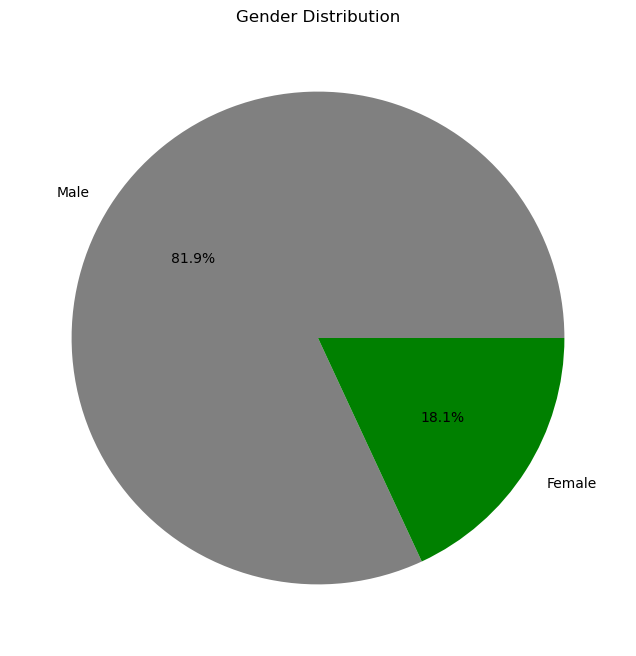

In [13]:
# Pie chart for 'Gender' counts
plt.figure(figsize=(8, 8))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['grey', 'green'])
plt.title('Gender Distribution')
plt.show()


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Gender'>

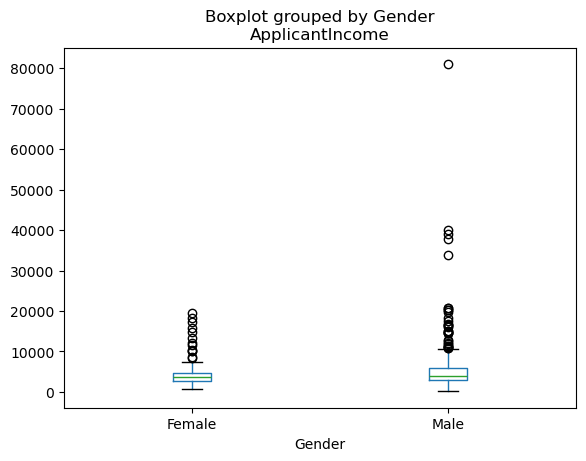

In [14]:
# Example 2: Boxplot for Applicant Income
df.boxplot(column='ApplicantIncome', by='Gender', grid=False)


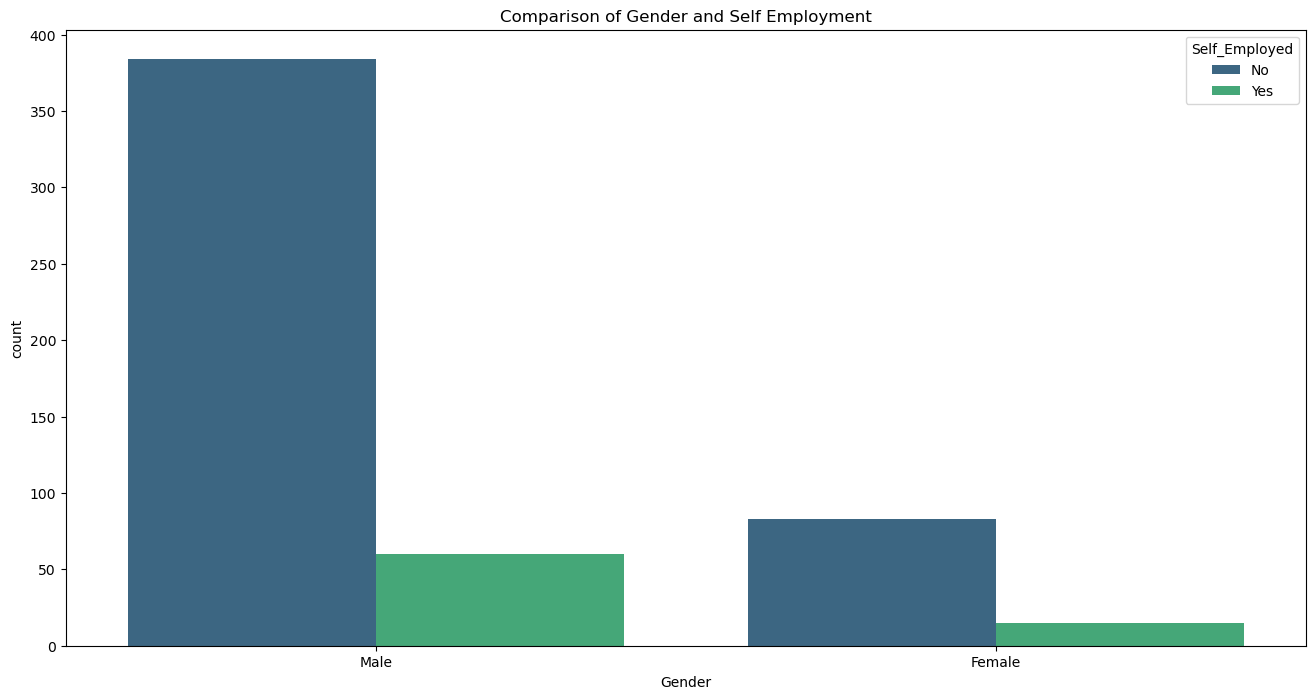

In [15]:
#Clustered bar chart for 'Gender', 'Education', 'Self_Employment', and 'Loan_Amount'
plt.figure(figsize=(16, 8))
sns.countplot(x='Gender', data=df, hue='Self_Employed', palette='viridis')
plt.title('Comparison of Gender and Self Employment')
plt.show()




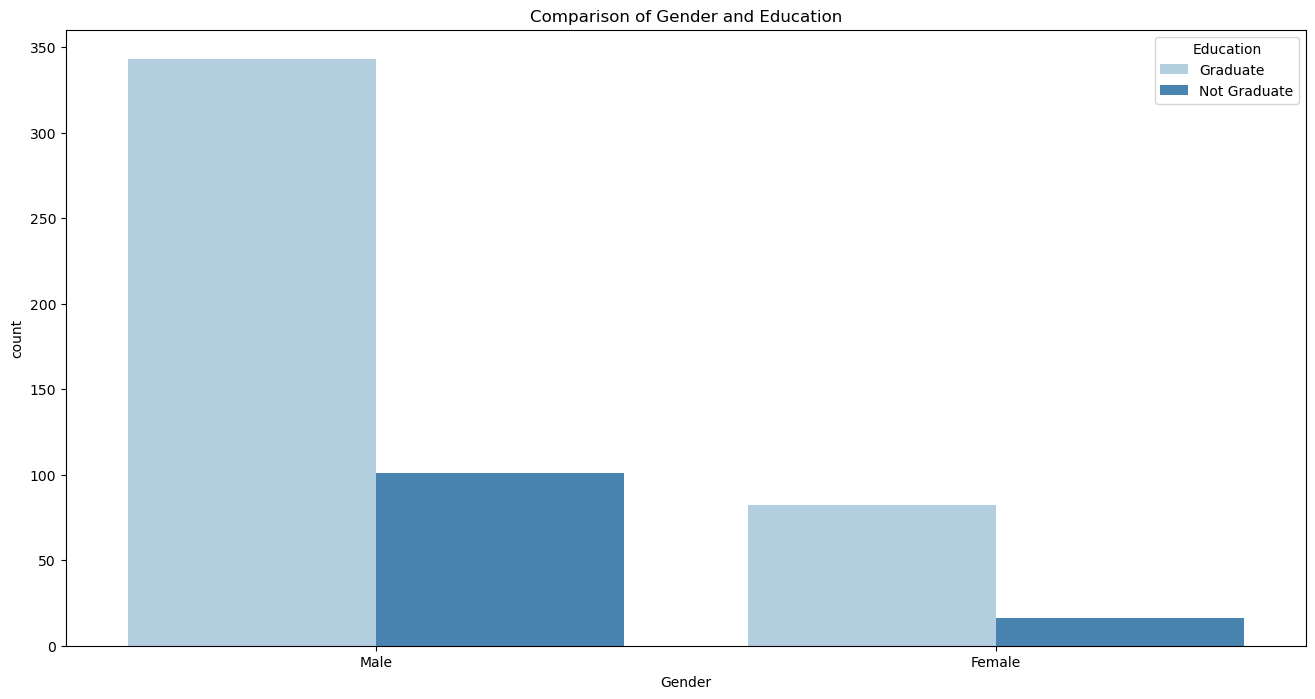

In [16]:
# Clustered bar chart for 'Gender' and 'Education'

plt.figure(figsize=(16, 8))
sns.countplot(x='Gender', data=df, hue='Education', palette='Blues')
plt.title('Comparison of Gender and Education')
plt.show()




Let's replace the Variable values to 
Numerical form & display the Value Counts

The data in Numerical form avoids disturbances in building the model. 

In [17]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [18]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [19]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [20]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [21]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [22]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [23]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [24]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [25]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [26]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [27]:
df['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

From the above figure, we can see that 'Credit_History' (Independent Variable) has the maximum correlation with 'Loan_Status' (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

 Final DataFrame

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


Importing Packages for Classification algorithms

In [29]:
#we will import scikit-learn for training and testing of data
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

 Splitting the data into Train and Test set

In [30]:
'''
iloc funtion in python is defining pandas module that help us to select a specific row or column from the data set.
using the iloc method, we can easily retrive any particular value from a row or column by using index value
'''
#selecting specific column for training and testing
#Extract the Dependent and Independent Variables
# x contains the values from the specified columns (1 through 4, 9 through 10, and 13 through 14).
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [31]:
# Splitting the dataset into training and testing sets
# X_train and y_train will contain 70% of the data for training,
# while X_test and y_test will hold the remaining 30% for testing.
# The random_state parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

 Logistic Regression (LR)

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.  Logistic regression is a statistical method used for binary classification,
 where it predicts the probability of an outcome (e.g., yes/no, spam/not spam) based on input features
c.

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)
x0 = metrics.f1_score
lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))
print('Logistic Regression precision = ', metrics.precision_score(lr_prediction,y_test))
print('Logistic Regression Recall = ', metrics.recall_score(lr_prediction,y_test))
print('Logistic Regression F1 Score = ', x0(lr_prediction,y_test))






Logistic Regression accuracy =  0.7914110429447853
Logistic Regression precision =  0.9811320754716981
Logistic Regression Recall =  0.7647058823529411
Logistic Regression F1 Score =  0.859504132231405


In [33]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
y_test [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


Certainly! The Random Forest Classifier combines multiple decision trees
to make accurate predictions in machine learning.

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)
x1 = metrics.f1_score
print("Accuracy of random forest classifier is ", metrics.accuracy_score(y_pred, y_test))
print("Accuracy of random forest classifier is ",x1(y_pred, y_test))


y_pred

Accuracy of random forest classifier is  0.7730061349693251
Accuracy of random forest classifier is  0.8438818565400844


array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

CONCLUSION:

1. The Loan Status is heavily dependent on the Credit History for Predictions.
2. The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to random forest classifer

The main importance of the F1 score is to strike a balance between precision (accuracy of positive predictions)
and recall (ability to find all positive cases) in binary classification tasks. 
It provides a single metric that considers both aspects, helping evaluate a model’s overall performance

In [36]:
import joblib
# Save the Best Model (choose the one with higher F1 Score)
value_x0 = x0(lr_prediction,y_test)  # Evaluate the function x0 to get its value
value_x1 = x1(y_pred, y_test) # Evaluate the function x1 to get its value

if value_x0 > value_x1:
    joblib.dump(model, 'loan_approval_lr_model.joblib')
else:
    joblib.dump(rf_clf, 'loan_approval_dt_model.joblib')
